In [1]:
# Import necessary libraries
import glob
import re
import torch
import joypy
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

current_time = datetime.datetime.now()
current_time = current_time.strftime("%m%d-%H_%M_%S")
# Step 1: Prepare separate lists
all_data_no_true = []
all_data_true = []
path = '../analyze_result_temp/class_acc_sumlist'


#+++++++=========== figure2, dataset is val
files_all = sorted(glob.glob(path +'/*.json'), key=lambda x: int(re.findall('(\d+)', x)[-1]))

#+++++++=========== select the file name:
file_plot = files_all[0]
file_plot_PLL = files_all[1]

with open(file_plot, "r") as file:
    data = json.load(file)
print(len(data), data )
with open(file_plot_PLL, "r") as file:
    data_PLL = json.load(file)
print(len(data_PLL), data_PLL )

/mnt/disk2/zjh/projects7.12/conda_envs/py39torch1121/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


51 [{'face': 49.42528735632184, 'leopard': 90.0, 'motorbike': 100.0, 'accordion': 81.81818181818181, 'airplane': 98.75, 'anchor': 25.0, 'ant': 75.0, 'barrel': 44.44444444444444, 'bass': 45.45454545454545, 'beaver': 66.66666666666667, 'binocular': 57.142857142857146, 'bonsai': 100.0, 'brain': 90.0, 'brontosaurus': 66.66666666666667, 'buddha': 94.11764705882354, 'butterfly': 94.44444444444444, 'camera': 90.0, 'cannon': 66.66666666666667, 'car_side': 100.0, 'ceiling_fan': 88.88888888888889, 'cellphone': 66.66666666666667, 'chair': 33.333333333333336, 'chandelier': 85.71428571428571, 'cougar_body': 77.77777777777777, 'cougar_face': 92.85714285714286, 'crab': 60.0, 'crayfish': 57.142857142857146, 'crocodile': 80.0, 'crocodile_head': 80.0, 'cup': 27.272727272727273, 'dalmatian': 100.0, 'dollar_bill': 100.0, 'dolphin': 100.0, 'dragonfly': 100.0, 'electric_guitar': 80.0, 'elephant': 76.92307692307692, 'emu': 90.9090909090909, 'euphonium': 76.92307692307692, 'ewer': 76.47058823529412, 'ferry': 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"        #other opt: worst_classes, largest_gap_classes, additional_classes

# Additional specific classes to display
additional_classes = [ ]
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(sorted_class_averages, sorted_class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))

for idx, class_name in enumerate(display_classes, start=1):
    class_accuracies = [item[class_name] for item in data]
    ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-2-78460739d5ee>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


TypeError: list indices must be integers or slices, not str

<ipython-input-3-eaba902d1989>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


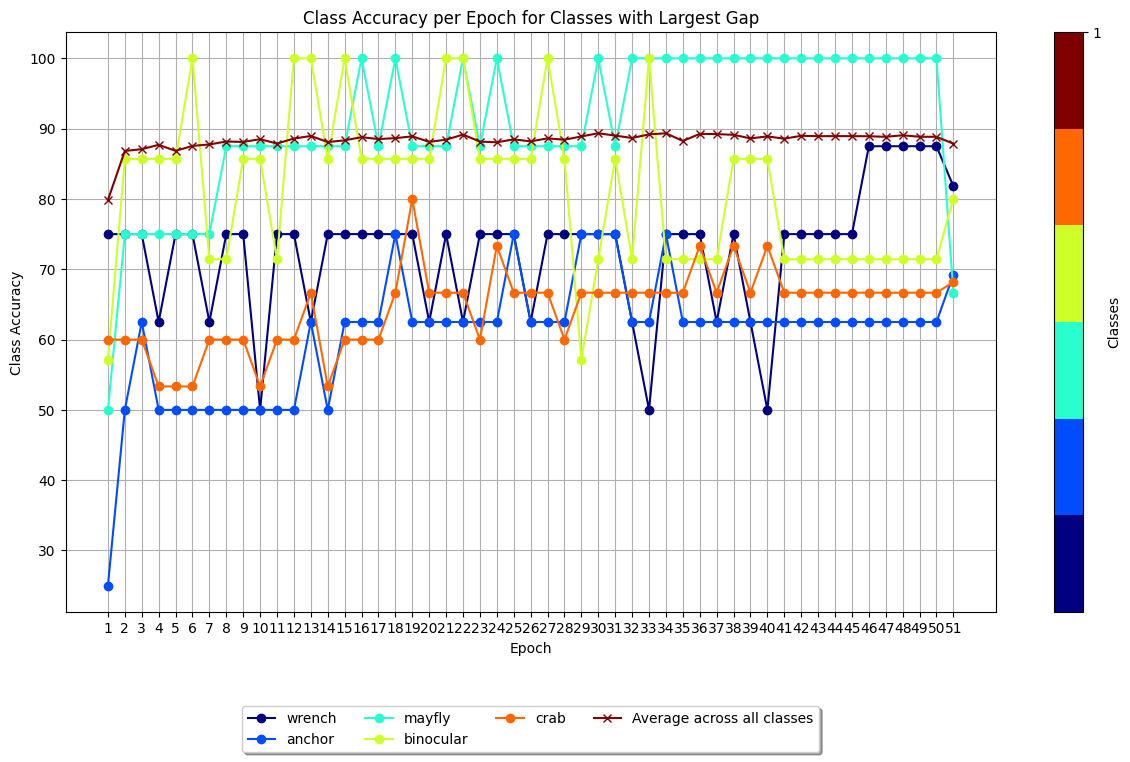

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"        #other opt: worst_classes, largest_gap_classes, additional_classes

# Additional specific classes to display
additional_classes = [ ]
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))

for idx, class_name in enumerate(display_classes, start=1):
    class_accuracies = [item[class_name] for item in data]
    ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-4-4e5acf626f0c>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


largest_gap_classes are: ['wrench', 'anchor', 'mayfly', 'binocular', 'crab']


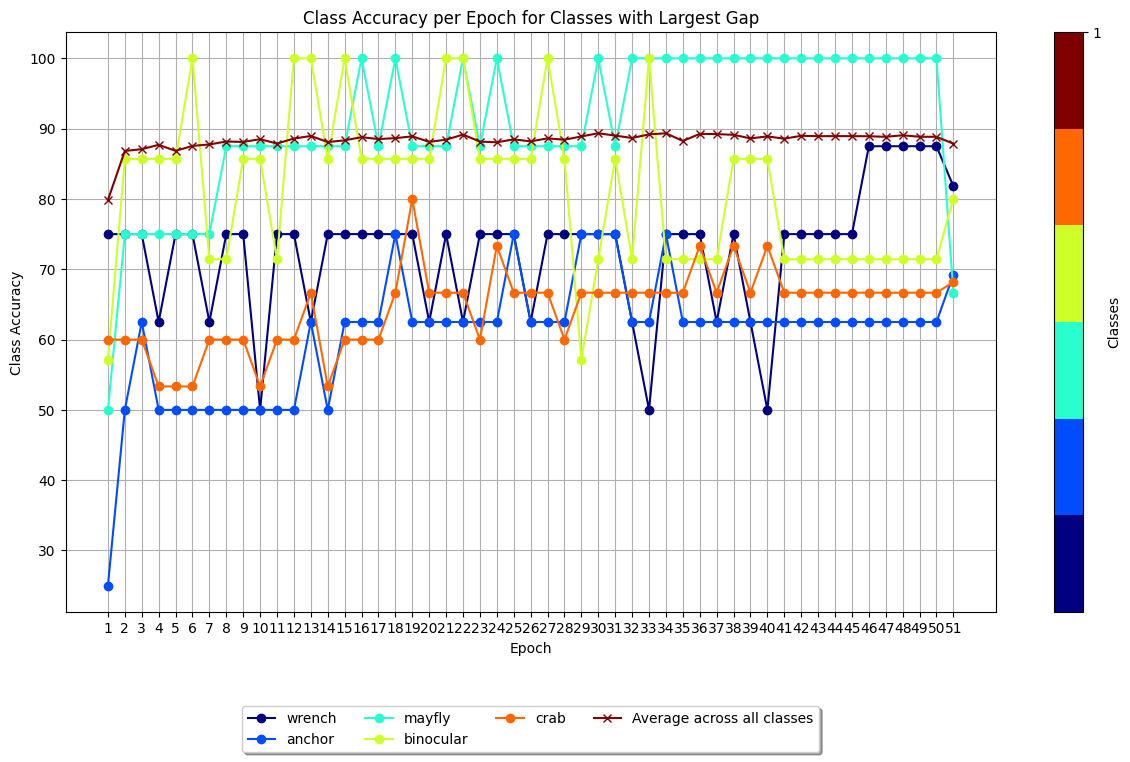

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"        #other opt: worst_classes, largest_gap_classes, additional_classes

# Additional specific classes to display
additional_classes = [ ]
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))

for idx, class_name in enumerate(display_classes, start=1):
    class_accuracies = [item[class_name] for item in data]
    ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-5-0a99e55c67c8>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


largest_gap_classes are: ['wrench', 'anchor', 'mayfly', 'binocular', 'crab']
their AVG gap (data-data_PLL) are: [('wrench', 30.32531194295901), ('anchor', 27.187028657616885), ('mayfly', 25.98039215686275), ('binocular', 17.002801120448183), ('crab', 16.565656565656568)]


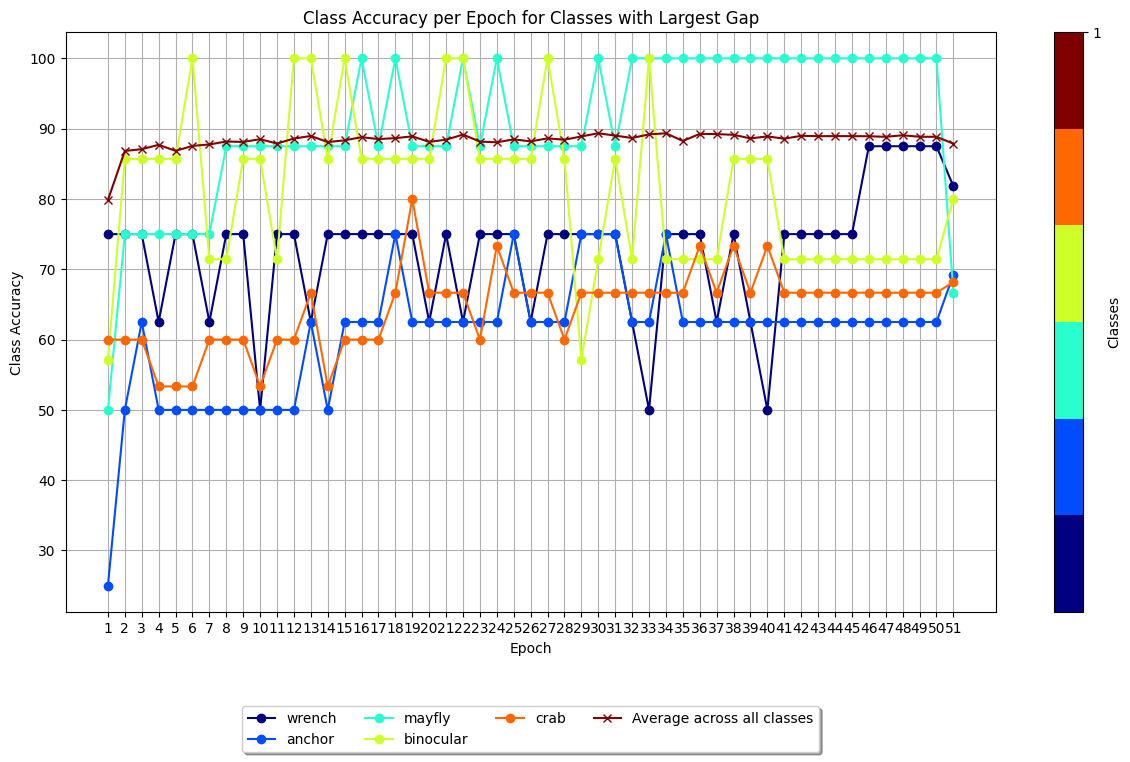

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"        #other opt: worst_classes, largest_gap_classes, additional_classes

# Additional specific classes to display
additional_classes = [ ]
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))

for idx, class_name in enumerate(display_classes, start=1):
    class_accuracies = [item[class_name] for item in data]
    ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-6-9907d241e679>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


largest_gap_classes are: ['wrench', 'anchor', 'mayfly', 'binocular', 'crab']
their AVG gap (data-data_PLL) are: [('wrench', 30.32531194295901), ('anchor', 27.187028657616885), ('mayfly', 25.98039215686275), ('binocular', 17.002801120448183), ('crab', 16.565656565656568)]


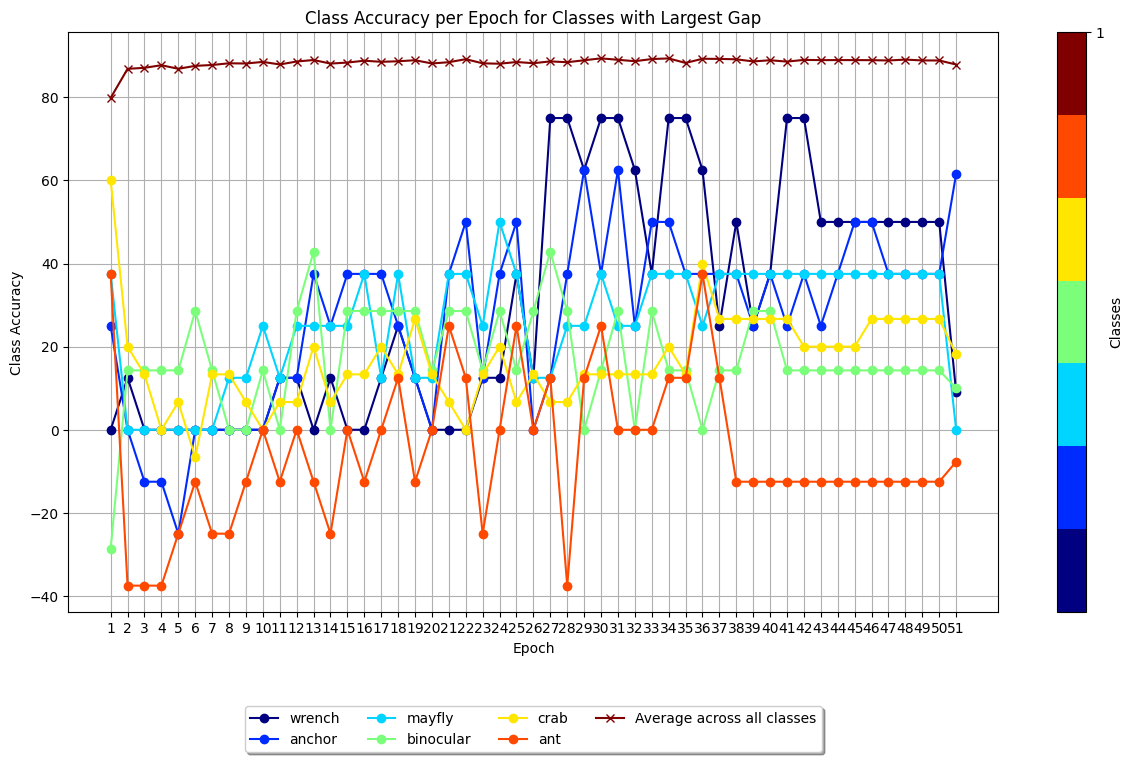

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"        #other opt: worst_classes, largest_gap_classes, additional_classes

# Additional specific classes to display
additional_classes = ['ant']
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))


if compare_data_PLL == True:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] - item_PLL[class_name] for item, item_PLL in zip(data, data_PLL)]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))
else:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] for item in data]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-7-feba3cb10292>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


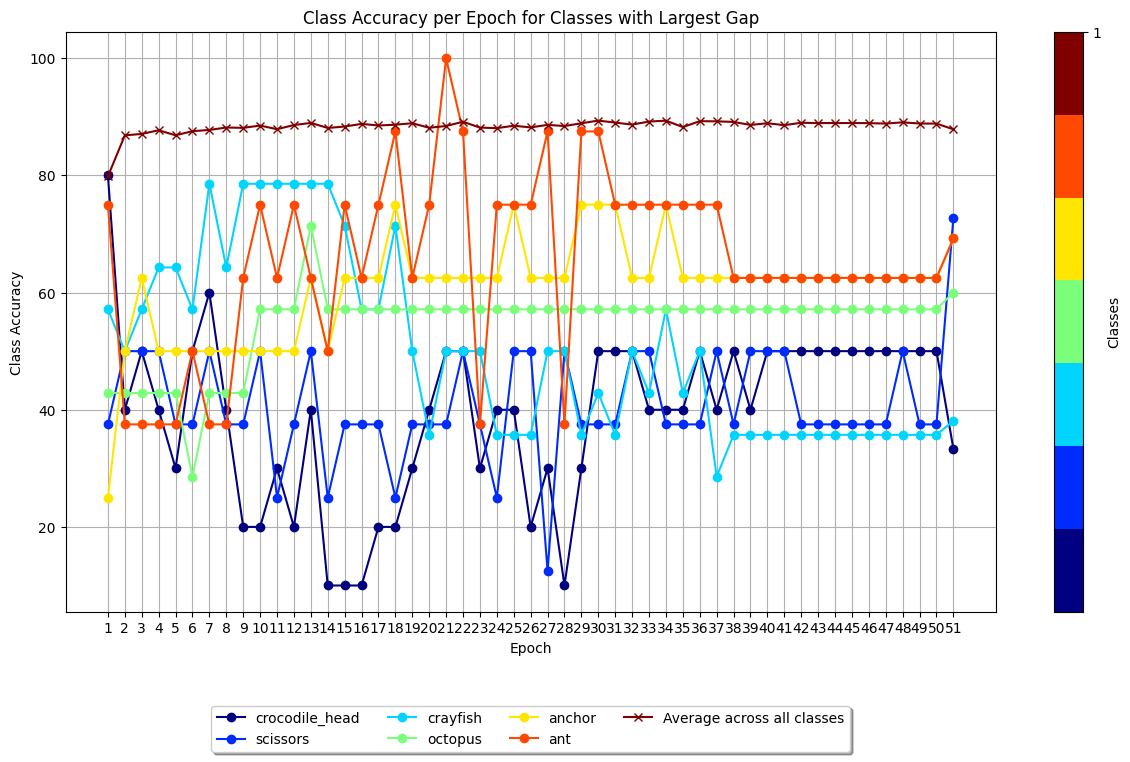

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = False
display_classes = "worst_classes + additional_classes"        #other opt: "worst_classes + additional_classes" , "largest_gap_classes + additional_classes"

# Additional specific classes to display
additional_classes = ['ant']
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num
else:
    assert 'worst_classes' in display_classes

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))


if compare_data_PLL == True:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] - item_PLL[class_name] for item, item_PLL in zip(data, data_PLL)]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))
else:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] for item in data]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

<ipython-input-8-45bb1e4fd2a6>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


largest_gap_classes are: ['wrench', 'anchor', 'mayfly', 'binocular', 'crab']
their AVG gap (data-data_PLL) are: [('wrench', 30.32531194295901), ('anchor', 27.187028657616885), ('mayfly', 25.98039215686275), ('binocular', 17.002801120448183), ('crab', 16.565656565656568)]


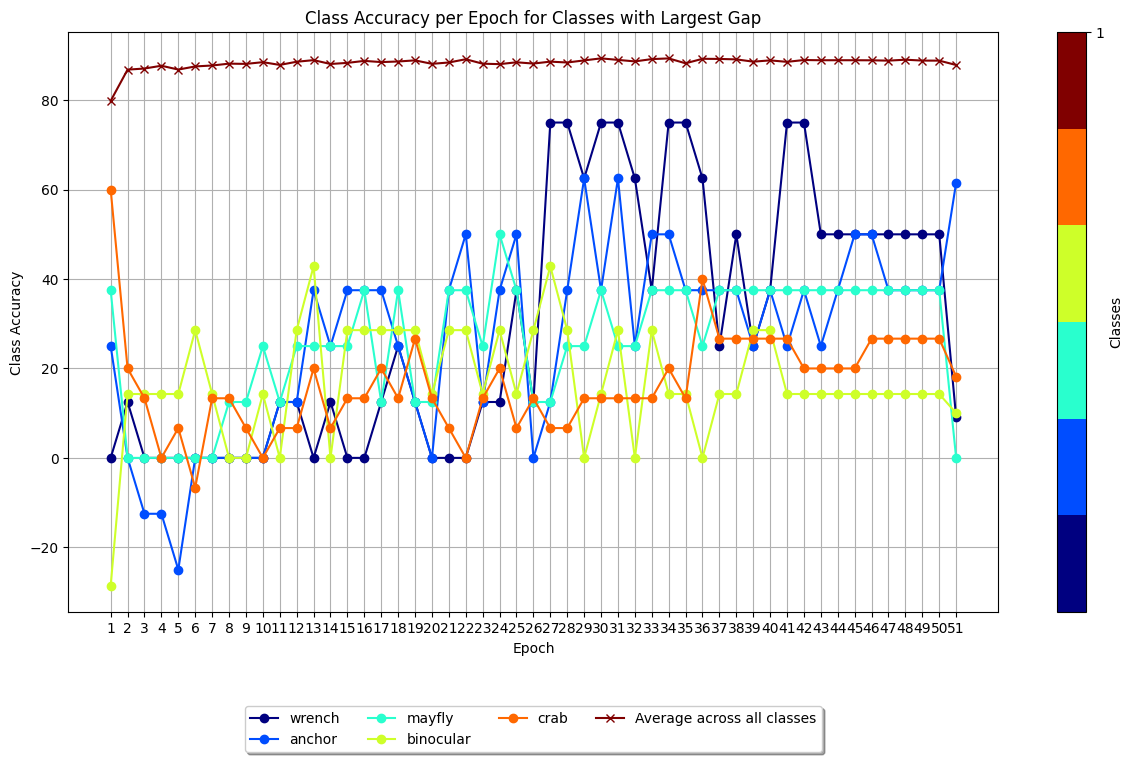

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

##============set params:
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True
display_classes = "largest_gap_classes + additional_classes"       #other opt: "worst_classes + additional_classes", "largest_gap_classes + additional_classes"

# Additional specific classes to display
additional_classes = [  ]
##============set params:

class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num
else:
    assert 'worst_classes' in display_classes

# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)

# Get the worst-performing classes and classes with the largest gap
worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')

display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))


if compare_data_PLL == True:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] - item_PLL[class_name] for item, item_PLL in zip(data, data_PLL)]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))
else:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] for item in data]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

51 [{'face': 49.42528735632184, 'leopard': 90.0, 'motorbike': 100.0, 'accordion': 81.81818181818181, 'airplane': 98.75, 'anchor': 25.0, 'ant': 75.0, 'barrel': 44.44444444444444, 'bass': 45.45454545454545, 'beaver': 66.66666666666667, 'binocular': 57.142857142857146, 'bonsai': 100.0, 'brain': 90.0, 'brontosaurus': 66.66666666666667, 'buddha': 94.11764705882354, 'butterfly': 94.44444444444444, 'camera': 90.0, 'cannon': 66.66666666666667, 'car_side': 100.0, 'ceiling_fan': 88.88888888888889, 'cellphone': 66.66666666666667, 'chair': 33.333333333333336, 'chandelier': 85.71428571428571, 'cougar_body': 77.77777777777777, 'cougar_face': 92.85714285714286, 'crab': 60.0, 'crayfish': 57.142857142857146, 'crocodile': 80.0, 'crocodile_head': 80.0, 'cup': 27.272727272727273, 'dalmatian': 100.0, 'dollar_bill': 100.0, 'dolphin': 100.0, 'dragonfly': 100.0, 'electric_guitar': 80.0, 'elephant': 76.92307692307692, 'emu': 90.9090909090909, 'euphonium': 76.92307692307692, 'ewer': 76.47058823529412, 'ferry': 

<ipython-input-11-549cd5b75103>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


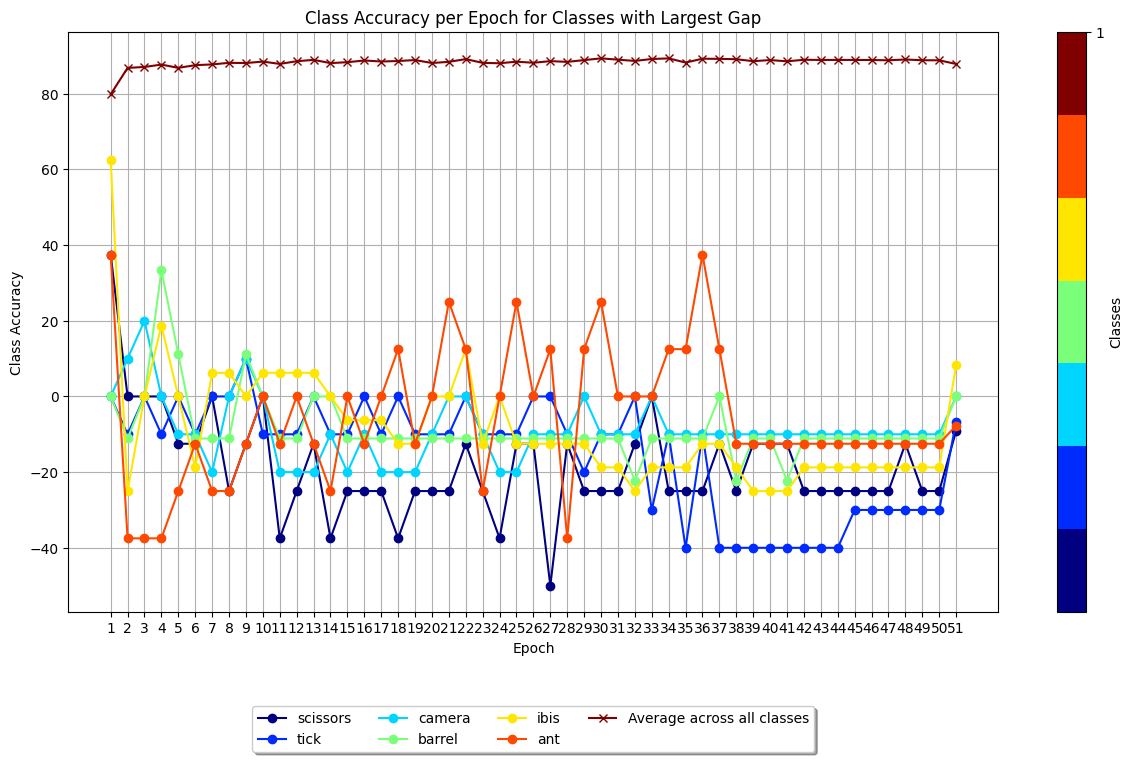

In [11]:
# Import necessary libraries
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

current_time = datetime.datetime.now()
current_time = current_time.strftime("%m%d-%H_%M_%S")
# Step 1: Prepare separate lists
all_data_no_true = []
all_data_true = []
##================set params:
path = '../analyze_result_temp/class_acc_sumlist'
# Number of worst-performing classes to display
num_worst_classes = 5

# Whether to compare data and data_PLL:
compare_data_PLL = True

# Additional specific classes to display
additional_classes = ['ant']
##================set params:

files_all = sorted(glob.glob(path +'/*.json'), key=lambda x: int(re.findall('(\d+)', x)[-1]))

#+++++++=========== select the file name:
file_plot = files_all[0]                            #NOTE also need to set here manually
with open(file_plot, "r") as file:
    data = json.load(file)
print(len(data), data )

if compare_data_PLL == True:
    file_plot_PLL = files_all[1]                    #NOTE also need to set here manually
    with open(file_plot_PLL, "r") as file:
        data_PLL = json.load(file)
    print(len(data_PLL), data_PLL )

## %%
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

# check the data:
class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num
    display_classes = "largest_gap_classes + additional_classes"        #other opt: "worst_classes + additional_classes" , "largest_gap_classes + additional_classes"
else:
    display_classes = "worst_classes + additional_classes"        #other opt: "worst_classes + additional_classes" , "largest_gap_classes + additional_classes"


# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    # sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=False)


if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')
else:
    # Get the worst-performing classes and classes with the largest gap
    worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
    print(f'worst_classes are: {worst_classes}')
    print(f'worst_classes are: {sorted_class_averages[:num_worst_classes]}')
display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(15, 10))


if compare_data_PLL == True:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] - item_PLL[class_name] for item, item_PLL in zip(data, data_PLL)]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))
else:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] for item in data]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()

51 [{'face': 49.42528735632184, 'leopard': 90.0, 'motorbike': 100.0, 'accordion': 81.81818181818181, 'airplane': 98.75, 'anchor': 25.0, 'ant': 75.0, 'barrel': 44.44444444444444, 'bass': 45.45454545454545, 'beaver': 66.66666666666667, 'binocular': 57.142857142857146, 'bonsai': 100.0, 'brain': 90.0, 'brontosaurus': 66.66666666666667, 'buddha': 94.11764705882354, 'butterfly': 94.44444444444444, 'camera': 90.0, 'cannon': 66.66666666666667, 'car_side': 100.0, 'ceiling_fan': 88.88888888888889, 'cellphone': 66.66666666666667, 'chair': 33.333333333333336, 'chandelier': 85.71428571428571, 'cougar_body': 77.77777777777777, 'cougar_face': 92.85714285714286, 'crab': 60.0, 'crayfish': 57.142857142857146, 'crocodile': 80.0, 'crocodile_head': 80.0, 'cup': 27.272727272727273, 'dalmatian': 100.0, 'dollar_bill': 100.0, 'dolphin': 100.0, 'dragonfly': 100.0, 'electric_guitar': 80.0, 'elephant': 76.92307692307692, 'emu': 90.9090909090909, 'euphonium': 76.92307692307692, 'ewer': 76.47058823529412, 'ferry': 

<ipython-input-12-9832400498ea>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)


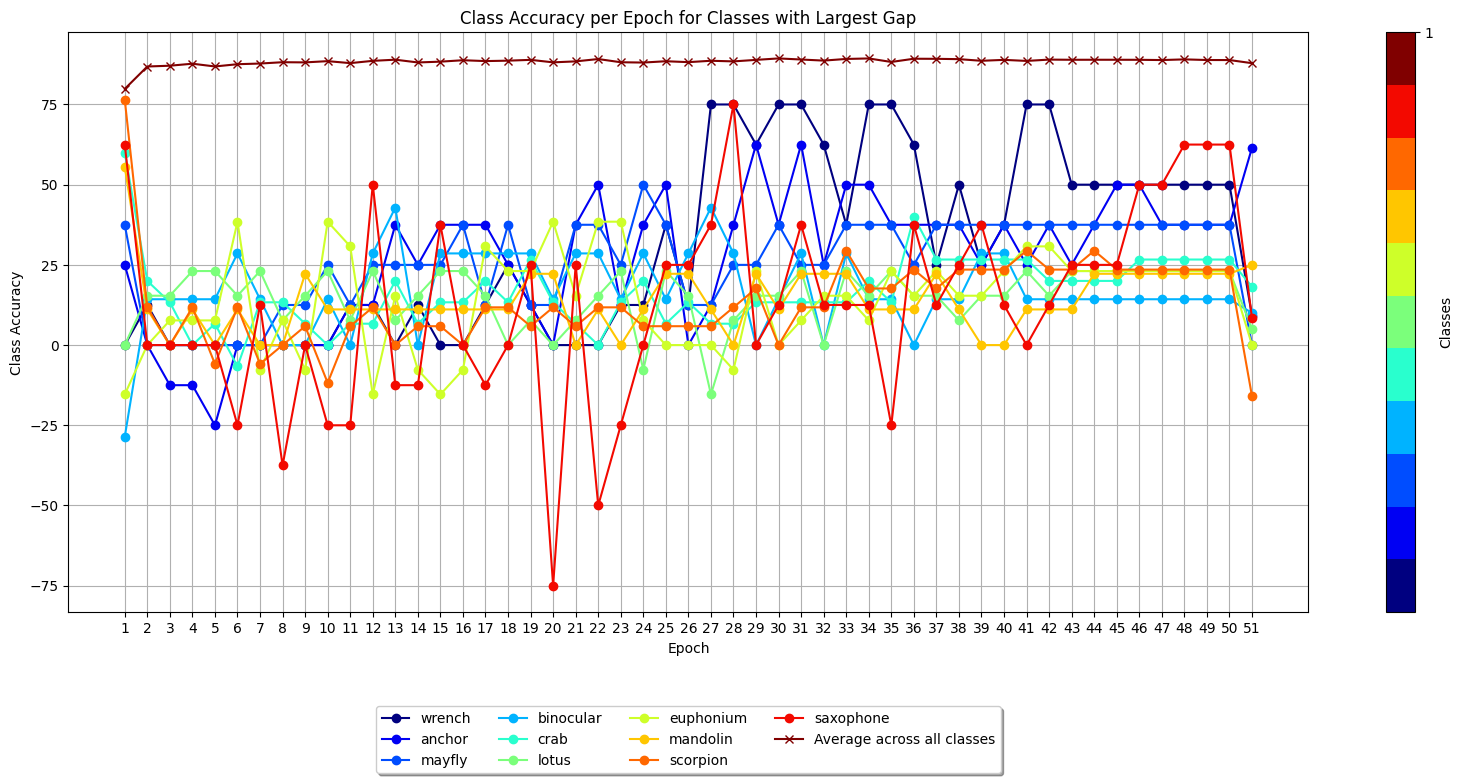

In [12]:
# Import necessary libraries
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

current_time = datetime.datetime.now()
current_time = current_time.strftime("%m%d-%H_%M_%S")
# Step 1: Prepare separate lists
all_data_no_true = []
all_data_true = []
##================set params:
path = '../analyze_result_temp/class_acc_sumlist'
# Number of worst-performing classes to display
num_worst_classes = 10

# Whether to compare data and data_PLL:
compare_data_PLL = True

# Additional specific classes to display
additional_classes = [ ]
##================set params:

files_all = sorted(glob.glob(path +'/*.json'), key=lambda x: int(re.findall('(\d+)', x)[-1]))

#+++++++=========== select the file name:
file_plot = files_all[0]                            #NOTE also need to set here manually
with open(file_plot, "r") as file:
    data = json.load(file)
print(len(data), data )

if compare_data_PLL == True:
    file_plot_PLL = files_all[1]                    #NOTE also need to set here manually
    with open(file_plot_PLL, "r") as file:
        data_PLL = json.load(file)
    print(len(data_PLL), data_PLL )

## %%
import matplotlib.pyplot as plt
import numpy as np

def compute_class_avg(data, class_name):
    class_accuracies = [item[class_name] for item in data]
    return np.mean(class_accuracies)
def compute_avg_gap(data, data_PLL, class_name):
    '''gap is the difference between data and data_PLL'''
    gaps = data[class_name] - data_PLL[class_name]
    return gaps

# check the data:
class_num = len(data[0])
epoch_num = len(data)
if compare_data_PLL == True:
    assert len(data_PLL[0]) == class_num
    assert len(data_PLL) == epoch_num
    display_classes = "largest_gap_classes + additional_classes"        #other opt: "worst_classes + additional_classes" , "largest_gap_classes + additional_classes"
else:
    display_classes = "worst_classes + additional_classes"        #other opt: "worst_classes + additional_classes" , "largest_gap_classes + additional_classes"


# Define the epochs and create a color map
epochs = list(range(1, epoch_num + 1))
color_map = plt.cm.get_cmap("jet", num_worst_classes + len(additional_classes) + 1)

# Calculate class average accuracies and average gaps between data and data_PLL
class_averages = {class_name: compute_class_avg(data, class_name) for class_name in data[0].keys()}
sorted_class_averages = sorted(class_averages.items(), key=lambda x: x[1])
if compare_data_PLL == True:
    class_averages_PLL = {class_name: compute_class_avg(data_PLL, class_name) for class_name in data_PLL[0].keys()}
    sorted_class_averages_PLL = sorted(class_averages_PLL.items(), key=lambda x: x[1])
    class_avg_gaps = {class_name: compute_avg_gap(class_averages, class_averages_PLL, class_name) for class_name in data[0].keys()}
    sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=True)
    # sorted_class_gaps = sorted(class_avg_gaps.items(), key=lambda x: x[1], reverse=False)


if compare_data_PLL == True:
    largest_gap_classes = [item[0] for item in sorted_class_gaps[:num_worst_classes]]
    print(f'largest_gap_classes are: {largest_gap_classes}')
    print(f'their AVG gap (data-data_PLL) are: {sorted_class_gaps[:num_worst_classes]}')
else:
    # Get the worst-performing classes and classes with the largest gap
    worst_classes = [item[0] for item in sorted_class_averages[:num_worst_classes]]
    print(f'worst_classes are: {worst_classes}')
    print(f'worst_classes are: {sorted_class_averages[:num_worst_classes]}')
display_classes = eval(display_classes)

# Compute the averages for all classes at each epoch
epoch_averages = [np.mean([epoch_data[class_name] for class_name in epoch_data]) for epoch_data in data]

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(20, 10))


if compare_data_PLL == True:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] - item_PLL[class_name] for item, item_PLL in zip(data, data_PLL)]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))
else:
    for idx, class_name in enumerate(display_classes, start=1):
        class_accuracies = [item[class_name] for item in data]
        ax.plot(epochs, class_accuracies, marker="o", label=class_name, color=color_map(idx - 1))

# Plot the average accuracy of all classes per epoch
ax.plot(epochs, epoch_averages, marker="x", label="Average across all classes", color=color_map(len(display_classes)))

ax.set_xticks(epochs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Class Accuracy")
ax.set_title("Class Accuracy per Epoch for Classes with Largest Gap")
ax.grid()

# Place the legend outside the plot area in a separate space
legend = ax.legend(
    ncol=4, loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True
)
fig.colorbar(
    plt.cm.ScalarMappable(cmap=color_map), ax=ax, label="Classes", ticks=[*range(1, epoch_num + 1, 10)]
)

# Adjust the plot layout to accommodate the external legend
plt.subplots_adjust(bottom=0.3)
plt.show()